# Data Science Project (Correlation) 

- Find out what kinds of things affect movie revenues.We will be doing that for all of the fields that you see here and seeing what fields are directly correlated or highly correlated with gross revenue.


- **Data Source:** https://www.kaggle.com/datasets/danielgrijalvas/movies


### Imported Libraries

In [28]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


### Data Prepartion & Cleaning

- Load the file using Pandas


- Look at some information about the data & thr columns


- Fix any missing or incorrect value

In [29]:
df = pd.read_csv(r'movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [30]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [31]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

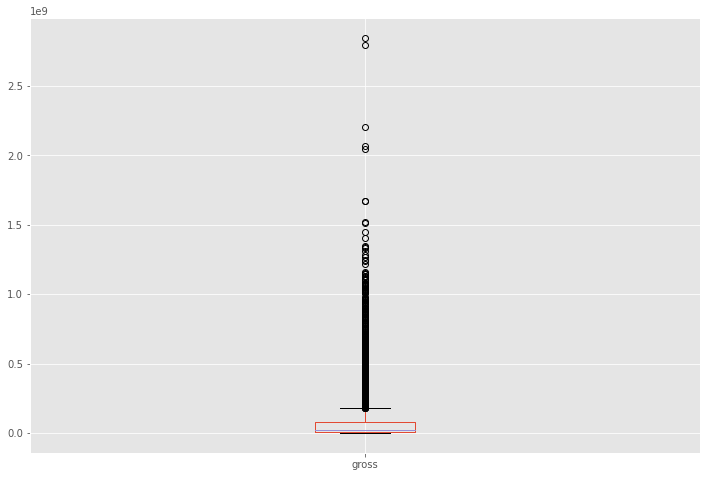

In [32]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [33]:
# Convert Type of budget and gross

df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

In [34]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [35]:
df = df.drop(['released'], axis =1)

In [36]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score      votes         director                   writer            star  \
0    8.4   927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000.0   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000.0     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000.0     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  
0  United Kingdom  19000000   46998772        Warner Bros.    146.0  
1   United States   4500000   58853106   Columbia Pictures    104.0  
2   United States  18000000  538375067           Lucasfilm    124.0  
3   United States   3500000   83453539  Paramount Pictures     88.0  
4   United States   6000000   39846344      Orion Pictures     98.0

In [37]:
pd.set_option('display.max_rows', None)

In [38]:
df =  df.sort_values(by=['gross'], inplace=False, ascending=False)

In [39]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [40]:
df.head()

name rating   genre  year  score  \
5445                                      Avatar  PG-13  Action  2009    7.8   
7445                           Avengers: Endgame  PG-13  Action  2019    8.4   
3045                                     Titanic  PG-13   Drama  1997    7.8   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015    7.8   
7244                      Avengers: Infinity War  PG-13  Action  2018    8.4   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget       gross                company  runtime  
5445  United States  237000000  2847246203  Twentieth Century Fox    162.0  
7445  United States  356000000  2797501328         Marvel Studios    181.0  
3045  United States  200000000  2201647264  Twentieth Century Fox    194.0  
6663  United States  245000000  2069521700              Lucasfilm    138.0  
7244  United States  321000000  2048359754         Marvel Studios    149.0

### Analysis & Visualization 

- Correlation: **Budget, Gross, Company**




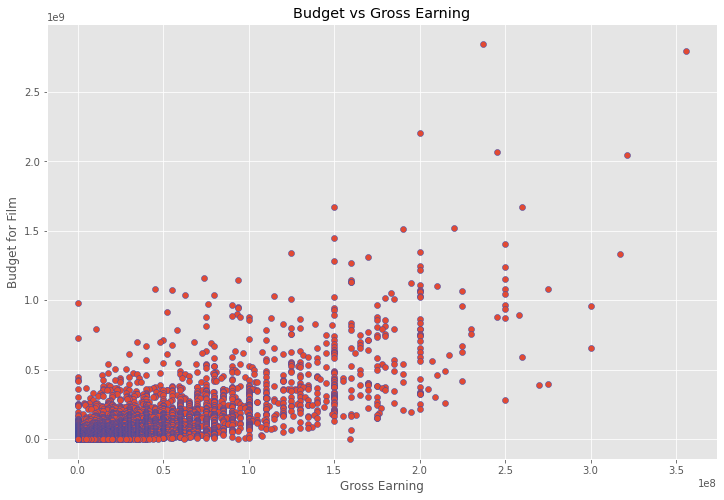

In [15]:

plt.scatter(x=df['budget'], y=df['gross'], edgecolors='#3e4cab')
plt.title("Budget vs Gross Earning")
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()



In [16]:
df.head()

name rating   genre  year  score  \
5445                                      Avatar  PG-13  Action  2009    7.8   
7445                           Avengers: Endgame  PG-13  Action  2019    8.4   
3045                                     Titanic  PG-13   Drama  1997    7.8   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015    7.8   
7244                      Avengers: Infinity War  PG-13  Action  2018    8.4   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget       gross                company  runtime  
5445  United States  237000000  2847246203  Twentieth Century Fox    162.0  
7445  United States  356000000  2797501328         Marvel Studios    181.0  
3045  United States  200000000  2201647264  Twentieth Century Fox    194.0  
6663  United States  245000000  2069521700              Lucasfilm    138.0  
7244  United States  321000000  2048359754         Marvel Studios    149.0

<AxesSubplot:xlabel='budget', ylabel='gross'>

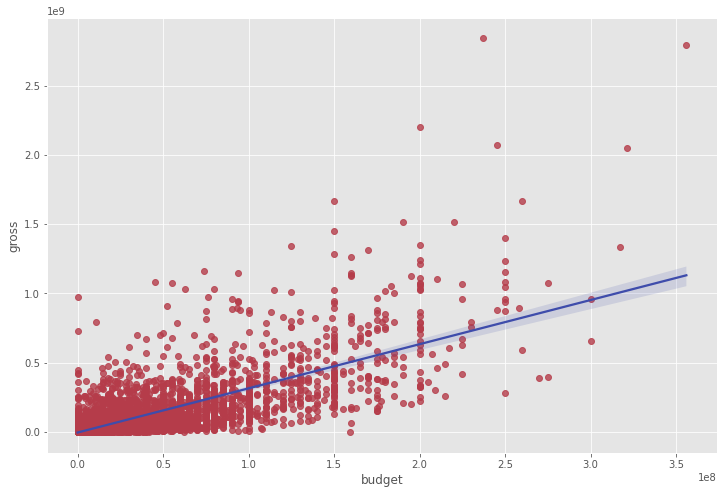

In [17]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={'color': '#b53c4a'}, line_kws={'color': '#3e4cab'})

In [18]:
# Looking at correlation
df.corr(method ='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

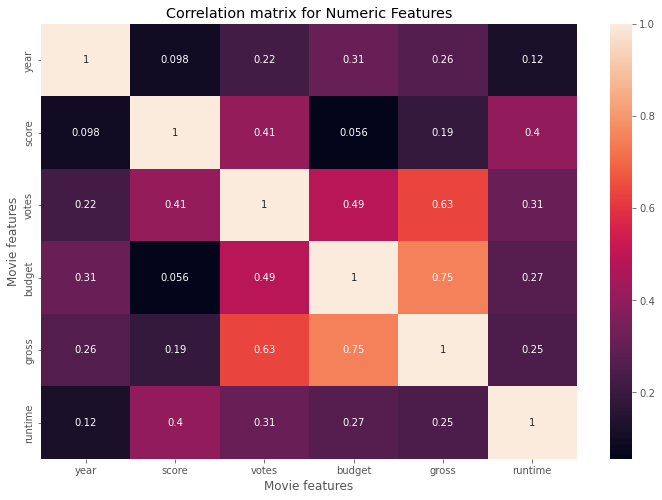

In [19]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [20]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  score      votes  director  writer  star  \
5445   533       5      0  2009    7.8  1100000.0      1155    1778  2334   
7445   535       5      0  2019    8.4   903000.0       162     743  2241   
3045  6896       5      6  1997    7.8  1100000.0      1155    1778  1595   
6663  5144       5      0  2015    7.8   876000.0      1125    2550   524   
7244   536       5      0  2018    8.4   897000.0       162     743  2241   
7480  6194       4      2  2019    6.9   222000.0      1455    1919   676   
6653  2969       5      0  2015    7.0   593000.0       517    3568   437   
6043  5502       5      0  2012    8.0  1300000.0      1517    2314  2241   
6646  2145       5      0  2015    7.1   370000.0      1189     706  2721   
7494  2131       4      2  2019    6.8   148000.0       432    1950  1527   
6644   534       5      0  2015    7.3   777000.0      1517    2314  2241   
7247   791       5      0  2018    7.3   661000.0      2457    3795   385   
5845  2407       5      1  2011    8.1   790000.0       679    4052   552   
7075  5145       5      0  2017    7.0   581000.0      2282    3518   524   
7271  2970       5      0  2018    6.2   277000.0      1121    1093   437   
6262  2130       4      2  2013    7.4   585000.0       432    1950  1527   
7072   657       4      7  2017    7.1   283000.0       250    4000   770   
7281  2760       4      2  2018    7.6   263000.0       303     491   508   
7055  5833       5      0  2017    6.6   214000.0       835    1431  2721   
6244  2823       5      0  2013    7.1   779000.0      2543    1174  2241   
6688  3622       4      2  2015    6.4   218000.0      1639     534  2347   
6846  1056       5      0  2016    7.8   694000.0       162     743   424   
7250   474       5      0  2018    6.9   404000.0      1189     990  1137   
4245  6221       5      0  2003    8.9  1700000.0      2193    1745   730   
7458  5084       5      0  2019    7.5   359000.0      1463     704  2643   
7456  1061       5      0  2019    6.8   478000.0       147     255   319   
5878  6968       5      0  2011    6.2   390000.0      1886    1237  2444   
6059  4951       5      0  2012    7.7   642000.0      2476    3125   544   
6494  6967       5      0  2014    5.6   302000.0      1886    1237  1751   
2448  6194       1      2  1994    8.5   970000.0      2415    1702  1797   
6047  5726       5      0  2012    8.4  1600000.0       483    2265   442   
7463  5141       5      0  2019    6.5   394000.0      1125     714   524   
7450  2930       6      5  2019    8.4  1000000.0      2767    4248  1256   
7488  6949       1      2  2019    7.7   217000.0      1509    2158  2640   
5685  6948       1      2  2010    8.2   776000.0      1678    2158  2640   
4852  4258       5      0  2006    7.3   668000.0       996    4147  1321   
6869  4616       5      0  2016    7.8   572000.0       912     717   817   
7481   290       4      1  2019    6.9   239000.0      1031    2078  2761   
5860  4261       5      0  2011    6.6   492000.0      2341    4147  1321   
7140  1552       4      2  2017    6.3   119000.0      1639     758  2504   
2245  2967       5      0  1993    8.1   894000.0      2660    2931  2329   
6908  1978       4      2  2016    7.3   250000.0       124     215   747   
3451  5138       4      0  1999    6.5   748000.0       963    1472   803   
5667   300       4      1  2010    6.4   392000.0      2745    2607  1846   
6863  7504       4      2  2016    8.0   450000.0       362     576   905   
6045  6001       5      1  2012    7.8   773000.0      2193    1359  1761   
3843  2412       4      1  2001    7.6   685000.0       435    1741   552   
5243  5725       5      0  2008    9.0  2400000.0       483    2265   442   
5652  2406       5      1  2010    7.7   495000.0       679    4052   552   
6311  1551       4      2  2013    7.3   377000.0      2237     758  2504   
6905  6108       4      1  2016    7.4   264000.0      1455    2362  1978   
70

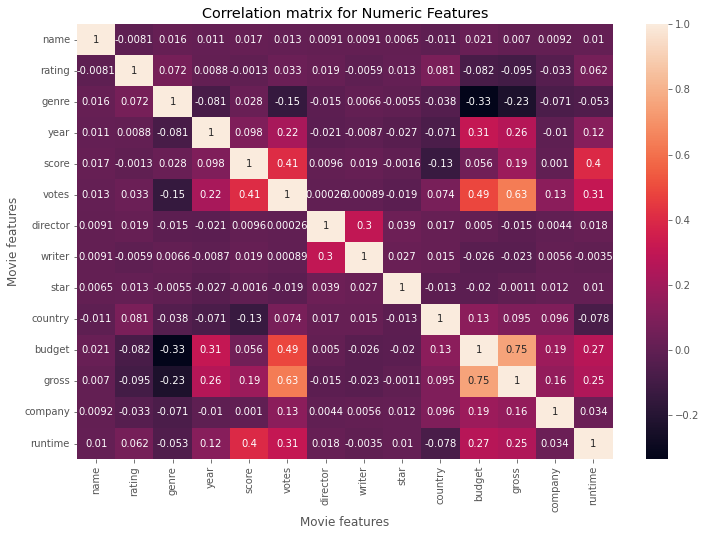

In [21]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
df_numerized.corr()

name    rating     genre      year     score     votes  \
name      1.000000 -0.008069  0.016355  0.011453  0.017097  0.013088   
rating   -0.008069  1.000000  0.072423  0.008779 -0.001314  0.033225   
genre     0.016355  0.072423  1.000000 -0.081261  0.027965 -0.145307   
year      0.011453  0.008779 -0.081261  1.000000  0.097995  0.222945   
score     0.017097 -0.001314  0.027965  0.097995  1.000000  0.409182   
votes     0.013088  0.033225 -0.145307  0.222945  0.409182  1.000000   
director  0.009079  0.019483 -0.015258 -0.020795  0.009559  0.000260   
writer    0.009081 -0.005921  0.006567 -0.008656  0.019416  0.000892   
star      0.006472  0.013405 -0.005477 -0.027242 -0.001609 -0.019282   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.133348  0.073625   
budget    0.020548 -0.081939 -0.334021  0.309212  0.055665  0.486862   
gross     0.006989 -0.095450 -0.234297  0.261900  0.186392  0.632834   
company   0.009211 -0.032943 -0.071067 -0.010431  0.001030  0.133204   
runtime   0.010392  0.062145 -0.052711  0.120811  0.399451  0.309212   

          director    writer      star   country    budget     gross  \
name      0.009079  0.009081  0.006472 -0.010737  0.020548  0.006989   
rating    0.019483 -0.005921  0.013405  0.081244 -0.081939 -0.095450   
genre    -0.015258  0.006567 -0.005477 -0.037615 -0.334021 -0.234297   
year     -0.020795 -0.008656 -0.027242 -0.070938  0.309212  0.261900   
score     0.009559  0.019416 -0.001609 -0.133348  0.055665  0.186392   
votes     0.000260  0.000892 -0.019282  0.073625  0.486862  0.632834   
director  1.000000  0.299067  0.039234  0.017490  0.004976 -0.014916   
writer    0.299067  1.000000  0.027245  0.015343 -0.025911 -0.022997   
star      0.039234  0.027245  1.000000 -0.012998 -0.019952 -0.001129   
country   0.017490  0.015343 -0.012998  1.000000  0.131720  0.095325   
budget    0.004976 -0.025911 -0.019952  0.131720  1.000000  0.750157   
gross    -0.014916 -0.022997 -0.001129  0.095325  0.750157  1.000000   
company   0.004404  0.005646  0.012442  0.095548  0.186474  0.156745   
runtime   0.017624 -0.003511  0.010174 -0.078412  0.269510  0.245235   

           company   runtime  
name      0.009211  0.010392  
rating   -0.032943  0.062145  
genre    -0.071067 -0.052711  
year     -0.010431  0.120811  
score     0.001030  0.399451  
votes     0.133204  0.309212  
director  0.004404  0.017624  
writer    0.005646 -0.003511  
star      0.012442  0.010174  
country   0.095548 -0.078412  
budget    0.186474  0.269510  
gross     0.156745  0.245235  
company   1.000000  0.034402  
runtime   0.034402  1.000000

In [23]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
genre     gross      -0.234297
gross     genre      -0.234297
votes     genre      -0.145307
genre     votes      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.095450
rating    gross      -0.095450
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.078412
country   runtime    -0.078412
genre     company    -0.071067
company   genre      -0.071067
year      country    -0.070938
country   year       -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
genre     country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
gross     writer     -0.022997
writer    gross      -0.022997
director

In [24]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

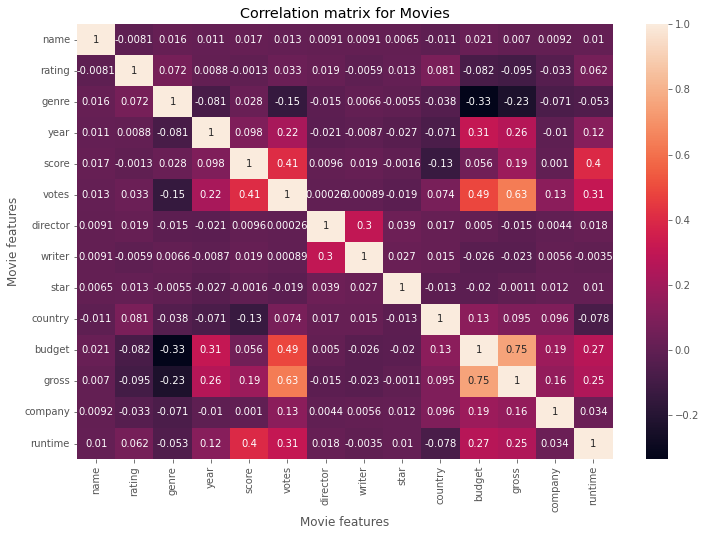

In [25]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

## Summery 

**Insights:**

- High corr between budjet and gross.


- High corr between votes and gross.


- Company has low Correlation.


So Budjet and Votes Have Highest Correlation to Gross Earnings.